Assignment 1

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMAGE_PATH = '..\digital-image-processing\Images\8_bit_image.jpeg'
BRIGHTNESS = 50
THRESHOLD = 128
GAMMA = 1.8

image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

if image is None:
    raise FileNotFoundError(f" Image not found at: {IMAGE_PATH}. Check the path and file name.")

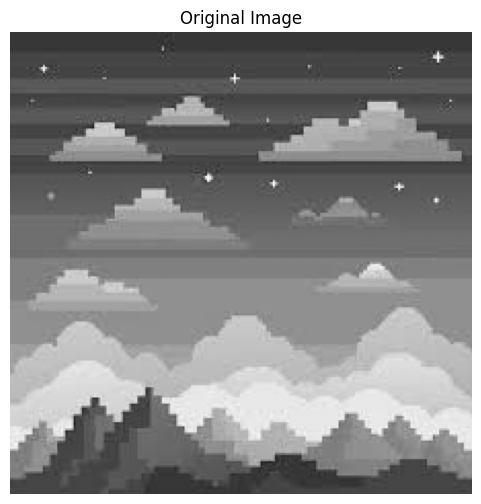

In [2]:
def show_image(img, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    plt.axis('off')
    plt.show()
show_image(image, "Original Image")

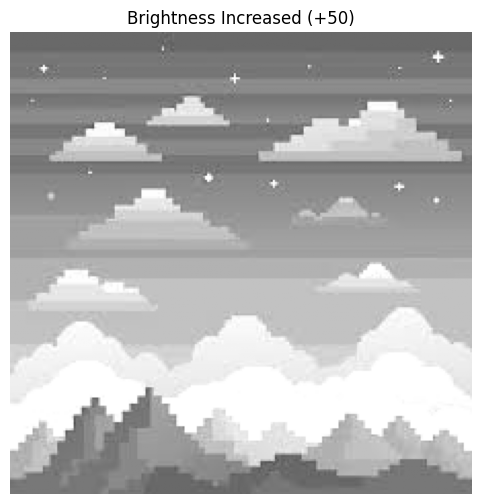

In [3]:
brighter = np.clip(image.astype(int) + BRIGHTNESS, 0, 255).astype(np.uint8)
show_image(brighter, f"Brightness Increased (+{BRIGHTNESS})")

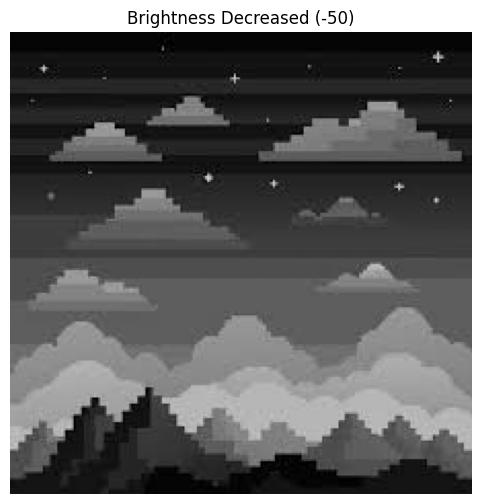

In [4]:
darker = np.clip(image.astype(int) - BRIGHTNESS, 0, 255).astype(np.uint8)
show_image(darker, f"Brightness Decreased (-{BRIGHTNESS})")

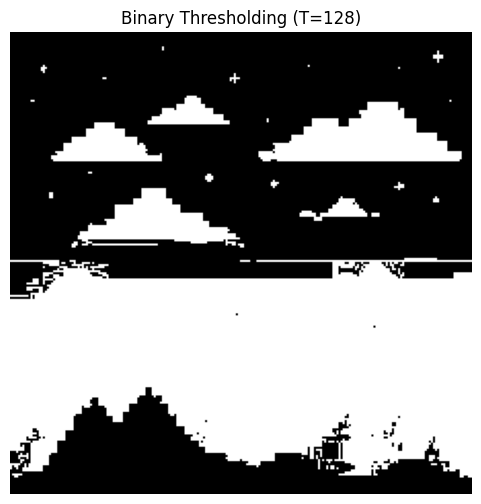

In [5]:
_, binary = cv2.threshold(image, THRESHOLD, 255, cv2.THRESH_BINARY)
show_image(binary, f"Binary Thresholding (T={THRESHOLD})")

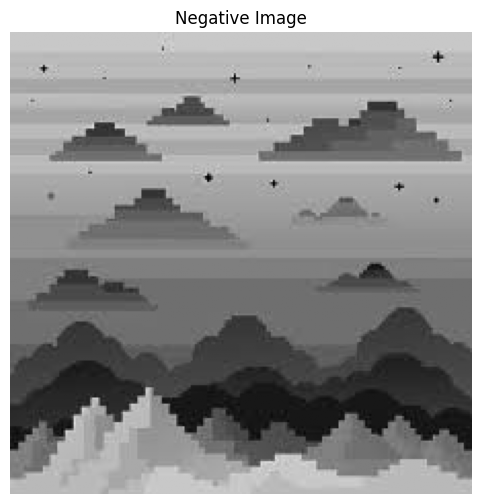

In [6]:
negative = 255 - image
show_image(negative, "Negative Image")

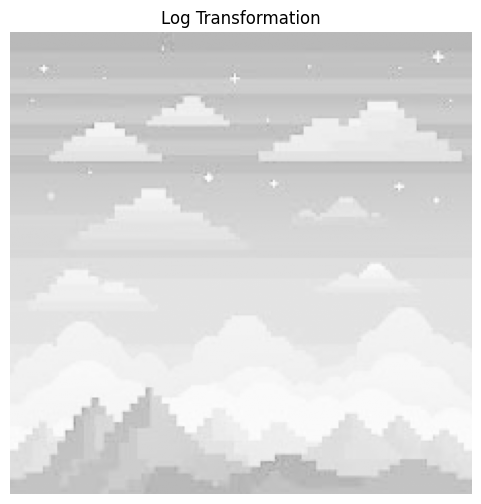

In [7]:
image_float = image.astype(np.float64)
max_val = np.max(image_float)
epsilon = 1e-5  # To avoid division by zero
c_log = 255 / np.log1p(max_val + epsilon)  # log1p(x) = log(1 + x)

log_trans = c_log * np.log1p(image_float)
log_trans = np.clip(log_trans, 0, 255).astype(np.uint8)
show_image(log_trans, "Log Transformation")

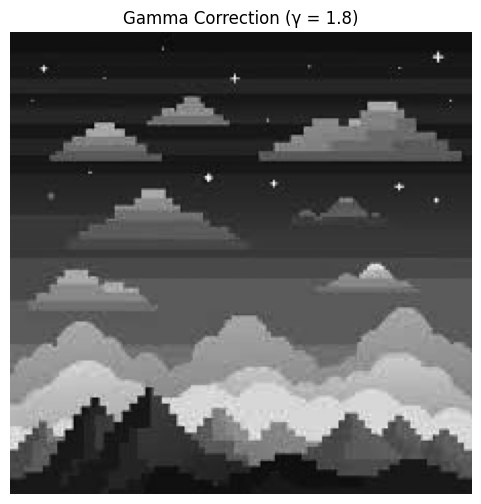

In [8]:
gamma_table = np.array([((i / 255.0) ** GAMMA) * 255 for i in range(256)]).astype("uint8")
gamma_corrected = cv2.LUT(image, gamma_table)
show_image(gamma_corrected, f"Gamma Correction (γ = {GAMMA})")

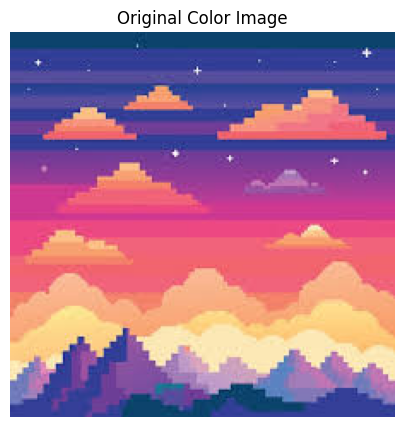

In [10]:
img_path = '..\digital-image-processing\Images\8_bit_image.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

def show_color(title, image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_color("Original Color Image", img)

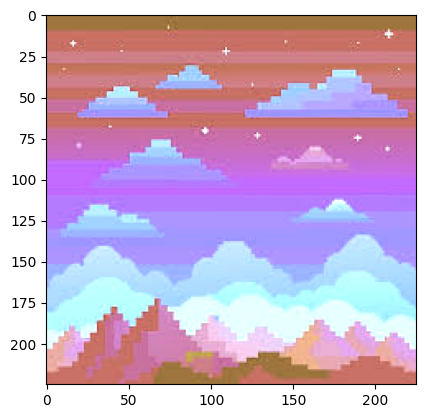

In [11]:
bright = cv2.add(img, np.full(img.shape, 50, dtype=np.uint8))
plt.imshow(bright, cmap='gray')
plt.show()

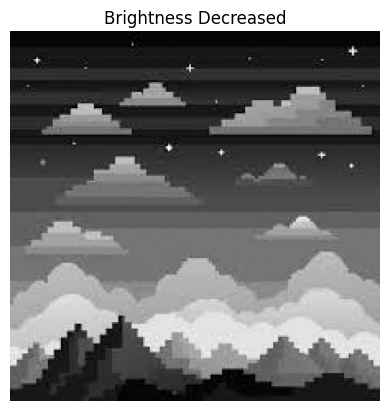

In [12]:
plt.imshow(darker, cmap='gray')
plt.title("Brightness Decreased")
plt.axis('off') 
plt.show()

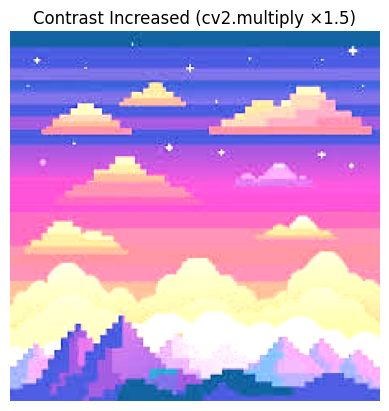

In [13]:
def show(title, image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

img_float = img.astype(np.float32)  # Convert to float for multiplication
multiplied = cv2.multiply(img_float, 1.5)
multiplied = np.clip(multiplied, 0, 255).astype(np.uint8)
show("Contrast Increased (cv2.multiply ×1.5)", multiplied)

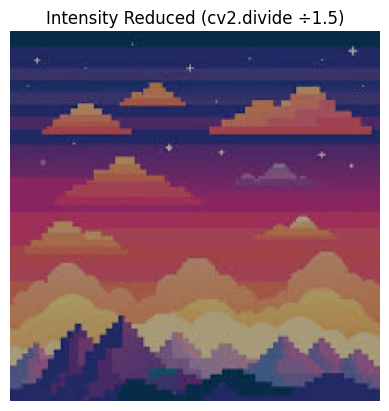

In [14]:
divided = cv2.divide(img_float, 1.5)
divided = np.clip(divided, 0, 255).astype(np.uint8)
show("Intensity Reduced (cv2.divide ÷1.5)", divided)

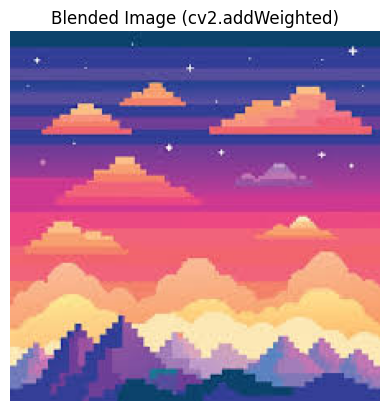

In [15]:
blended = cv2.addWeighted(img, 0.7, img, 0.3, 0)  # Blend image with itself
show("Blended Image (cv2.addWeighted)", blended)

Assignment 2

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_uint
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from skimage.color import rgb2gray

In [17]:
import numpy
import cv2
import skimage

print("NumPy version:", numpy.__version__)
print("OpenCV version:", cv2.__version__)
print("scikit-image version:", skimage.__version__)

NumPy version: 2.2.6
OpenCV version: 4.12.0
scikit-image version: 0.25.2


In [18]:
from PIL import Image

Image loaded successfully.


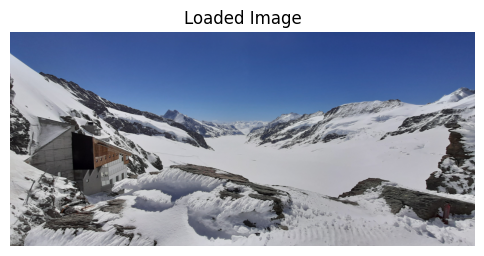

In [19]:
image = Image.open("../digital-image-processing/Images/Alsetch Glacier.jpg")
if image is None:
    raise FileNotFoundError("Image not found. Please check the path.")     
else:
    print("Image loaded successfully.")
    show_image(image, "Loaded Image")

In [20]:
print(image.size)
print(image.format) 
print(image.mode) 

(3264, 1504)
JPEG
RGB


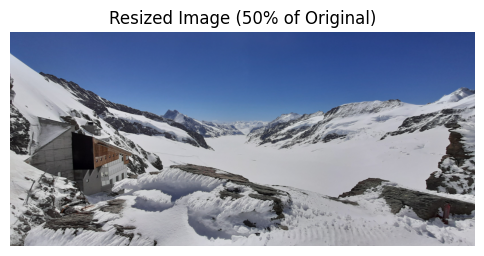

In [21]:
original_width, original_height = image.size
width = original_width // 2
height = original_height // 2
resized_image = image.resize((width, height))
show_image(resized_image, "Resized Image (50% of Original)")


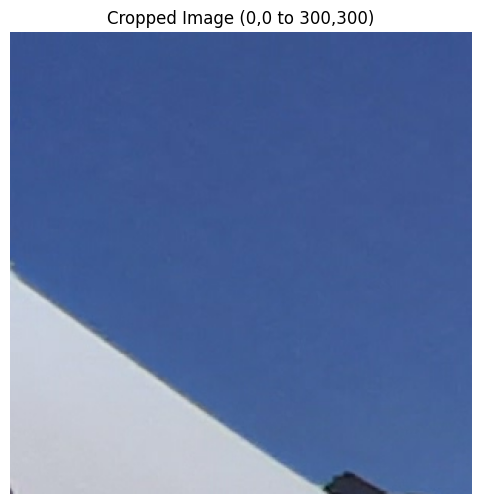

In [22]:
left = 0
top = 0
right = 300
bottom = 300
cropped_image = image.crop((left, top, right, bottom))
show_image(cropped_image, "Cropped Image (0,0 to 300,300)")

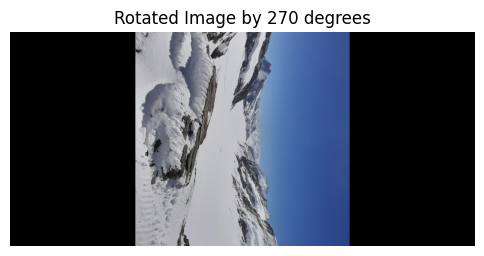

In [23]:
angle = 270
rotated_image = image.rotate(angle)
show_image(rotated_image, f"Rotated Image by {angle} degrees")

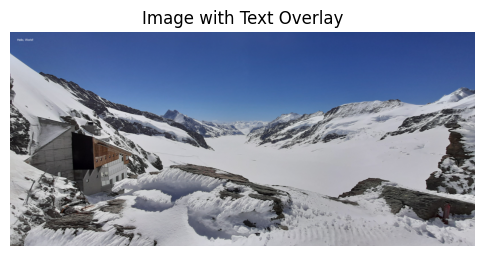

In [25]:
from PIL import Image, ImageDraw, ImageFont
image = Image.open("../digital-image-processing/Images/Alsetch Glacier.jpg")
draw = ImageDraw.Draw(image)
font = ImageFont.truetype("arial.ttf", 20)
text = "Hello, World!"
position = (50, 50)
color = (255, 255, 255)
draw.text(position, text, fill=color, font=font)
show_image(image, "Image with Text Overlay")

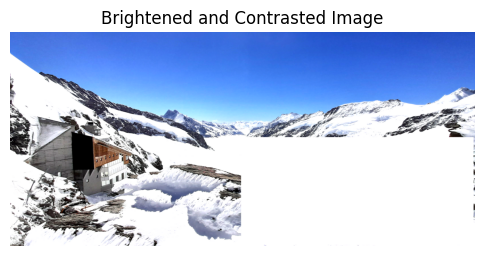

In [26]:
image = Image.open("../digital-image-processing/Images/Alsetch Glacier.jpg")
watermark = Image.open("../digital-image-processing/Images/watermark.png")

# Define position and size as before
width, height = image.size
watermark = watermark.resize((width // 2, height // 2))
position = (width - watermark.width - 10, height - watermark.height - 10)

# Paste the opaque watermark without a mask
image.paste(watermark, position)

from PIL import ImageEnhance

enhancer = ImageEnhance.Brightness(image)
brightened_image = enhancer.enhance(1.5)
enhancer = ImageEnhance.Contrast(brightened_image)
contrasted_image = enhancer.enhance(1.2)
show_image(contrasted_image, "Brightened and Contrasted Image")